In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from siphon.catalog import TDSCatalog
import metpy.calc as mpcalc
from metpy.units import units
from scipy.ndimage import gaussian_filter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [7]:
def get_data(year, month, start_day, start_hour, end_day, end_hour, directions): 
    year_string = str(year)
    url = f'https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.html?dataset=Datasets/cpc_global_precip/precip.{year_string}.nc'
    tds_catalog = TDSCatalog(url)
    ds_url = tds_catalog.datasets[0].access_urls['OPENDAP']
    ds = xr.open_dataset(ds_url).metpy.parse_cf()
    
    first_time = pd.Timestamp(year, month, start_day, start_hour)
    last_time = pd.Timestamp(year, month, end_day, end_hour)
    ds_sliced = ds.sel(time=slice(first_time, last_time))
    
    # Sum over the time range
    ds_summed = ds_sliced.sum(dim='time')
    
    return ds_summed

def plot_subplots(events, directions):    
    # Define precipitation levels and colormap
    levels = [0.3 * 2, 2.5 * 2, 6.4 * 2, 12.7 * 2, 19.1 * 2, 25.4 * 2, 38.1 * 2, 50.8 * 2, 63.5 * 2, 76.2 * 2]
    colors = ['#c9e7f0', '#95cbd5', '#6f98d0', '#45539e', '#8fbf5c', '#80ba55', '#568a4c', '#e4e44e', '#dcba60', '#d08c39', '#c43b33']
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(levels, cmap.N)

    # Create the figure with subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15), subplot_kw={'projection': ccrs.PlateCarree()})
    
    for ax, event in zip(axes, events):
        ds = event['data']
        month, start_day, end_day, year = event['month'], event['start_day'], event['end_day'], event['year']
        
        # Add land features
        ax.add_feature(cfeature.LAND, color='#fbf5ea')

        # Plot precipitation
        precip = ax.contourf(ds['lon'], ds['lat'], ds['precip'], levels=levels, cmap=cmap, extend='max', norm=norm)
        
        # Add coastlines, borders, and other features
        ax.set_extent([directions['West'] + 25, directions['East'], 30, directions['North'] - 5])
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
        ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', linewidth=0.5)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)

        # Add gridlines
        gls = ax.gridlines(draw_labels=True, color='black', linestyle='--', alpha=0.35)
        gls.top_labels = False
        gls.right_labels = False

        # Set the title
        ax.set_title(f'CPC Precipitation for {month} {start_day}-{end_day} {year}')
    
    # Adjust layout and add a horizontal colorbar at the bottom
    cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Adjust [left, bottom, width, height]
    fig.colorbar(precip, cax=cbar_ax, orientation='horizontal', label='mm')
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the colorbar
    plt.show()


C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.html?dataset=Datasets/cpc_global_precip/precip.2019.nc returned HTML. Changing to: https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.xml?dataset=Datasets/cpc_global_precip/precip.2019.nc
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,
C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.html?dataset=Datasets/cpc_global_precip/precip.2019.nc returned HTML. Changing to: https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.xml?dataset=Datasets/cpc_global_precip/precip.2019.nc
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,
C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://psl.noaa.gov/thredds/c

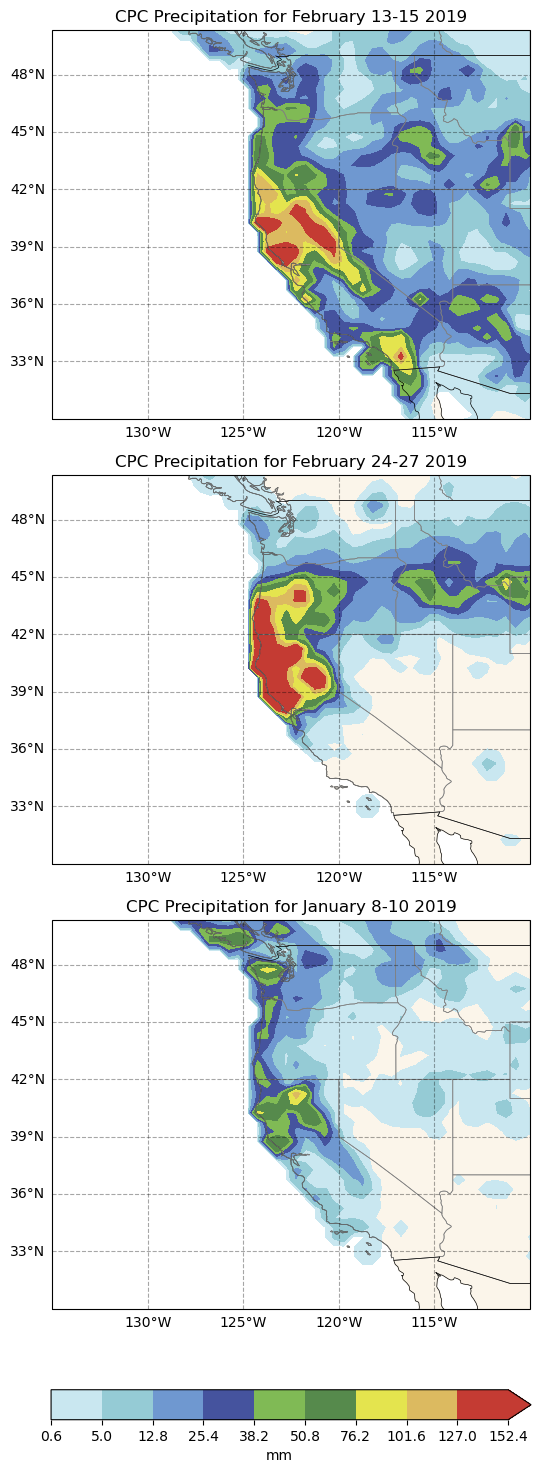

In [8]:
if __name__ == '__main__':
    directions = {
        'North': 55, 
        'East': 250, 
        'South': 20, 
        'West': 200  # Units: degrees North, degrees East
    }
    
    event_dates = [
        (2019, 2, 13, 0, 15, 23, 'February', 13, 15),
        (2019, 2, 24, 0, 25, 23, 'February', 24, 27),
        (2019, 1, 8, 0, 12, 23, 'January', 8, 10)
    ]
    
    events = [
        {
            'data': get_data(year, month, start_day, 0, end_day, 23, directions),
            'month': month_name,
            'start_day': start_day,
            'end_day': end_day,
            'year': year
        }
        for year, month, start_day, _, end_day, _, month_name, start_day, end_day in event_dates
    ]

    # Plot subplots for all events
    plot_subplots(events, directions)

In [9]:
def get_data(year, month, start_day, start_hour, end_day, end_hour, directions):
    year_string = str(year)
    url = f'https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.html?dataset=Datasets/cpc_global_precip/precip.{year_string}.nc'
    tds_catalog = TDSCatalog(url)
    ds_url = tds_catalog.datasets[0].access_urls['OPENDAP']
    ds = xr.open_dataset(ds_url).metpy.parse_cf()
    
    first_time = pd.Timestamp(year, month, start_day, start_hour)
    last_time = pd.Timestamp(year, month, end_day, end_hour)
    ds_sliced = ds.sel(time=slice(first_time, last_time))
    
    # Sum over the time range
    ds_summed = ds_sliced.sum(dim='time')
    
    return ds_summed

def plot_data(ds, directions, month, start_day, end_day, year):    
    # Double the original precipitation levels for two days
    levels = [0.3 * 2, 2.5 * 2, 6.4 * 2, 12.7 * 2, 19.1 * 2, 25.4 * 2, 38.1 * 2, 50.8 * 2, 63.5 * 2, 76.2 * 2]
    colors = ['#c9e7f0', '#95cbd5', '#6f98d0', '#45539e', '#8fbf5c', '#80ba55', '#568a4c', '#e4e44e', '#dcba60', '#d08c39', '#c43b33']
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(levels, cmap.N)

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    # Add the land and ocean features in the background
    ax.add_feature(cfeature.LAND, color='#fbf5ea')
    #ax.add_feature(cfeature.OCEAN, color='#ecf9fd')

    # Plot the precipitation
    precip = ax.contourf(ds['lon'], ds['lat'], ds['precip'], levels=levels, cmap=cmap, extend='max', norm=norm)
    plt.colorbar(precip, ax=ax, orientation='vertical', label='mm', fraction=0.046, pad=0.04)

    # Add coastlines, borders, and other features
    ax.set_extent([directions['West'] + 25, directions['East'], 30, directions['North'] - 5])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    # Add gridlines and format longitude/latitude labels
    gls = ax.gridlines(draw_labels=True, color='black', linestyle='--', alpha=0.35)
    gls.top_labels = False
    gls.right_labels = False

    # Set the title
    plt.title(f'CPC Precipitation for {month} {start_day}-{end_day} {year}')
    plt.tight_layout()
    plt.show()


C:\Users\Tony\anaconda3\lib\site-packages\siphon\catalog.py:292: UserWarning: URL https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.html?dataset=Datasets/cpc_global_precip/precip.2019.nc returned HTML. Changing to: https://psl.noaa.gov/thredds/catalog/Datasets/cpc_global_precip/catalog.xml?dataset=Datasets/cpc_global_precip/precip.2019.nc
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,


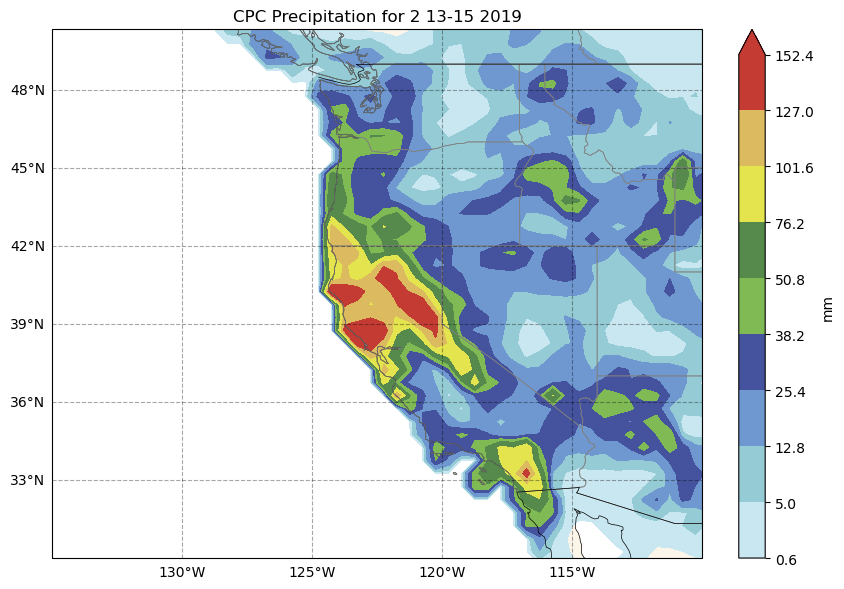

In [10]:
if __name__ == '__main__':
    directions = {'North': 55, 
                  'East': 250, 
                  'South': 20, 
                  'West': 200}  # Units: degrees North, degrees East
    year = 2019
    month = 2
    start_day = 13
    start_hour = 0
    end_day = 15  # Includes the next day
    end_hour = 23
    
    ds = get_data(year, month, start_day, start_hour, end_day, end_hour, directions)
    plot_data(ds, directions, month, start_day, end_day, year)
